In [89]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (14,10)})

In [37]:
def number_to_base(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(n % b)
        n //= b
    return digits[::-1]

In [38]:
number_to_base(7,2)

[1, 1, 1]

In [39]:
number_to_base(16,5)

[3, 1]

In [40]:
def contfrac_to_frac(seq: list):
    """
    Convert the simple continued fraction in `seq` 
    into a fraction, num / den
    """
    num, den = 1, 0
    for u in reversed(seq):
        num, den = den + num*u, num
    return num, den

In [42]:
def reachable_fractions(length: int, base: int = 2):
    reachable = Counter()
    for i in range(base**length):
        shorter_seq = number_to_base(i, base)
        pad_len = length - len(shorter_seq)
        seq = [0] * pad_len + shorter_seq
        num, den = contfrac_to_frac(seq)
        if den != 0 and num <= den:
            reachable.update([(num, den)])
    return reachable.most_common()

<AxesSubplot:>

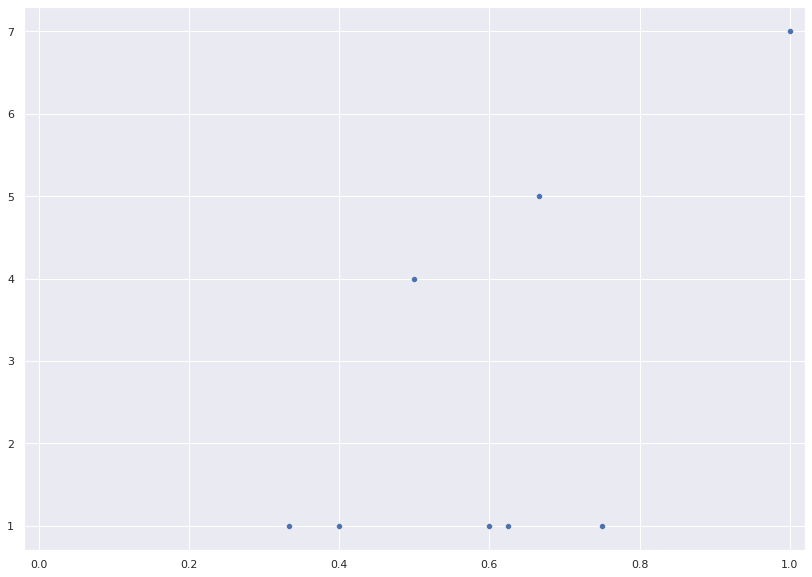

In [94]:
def to_scatter(reachable_result):
    points = [(num/den, count) for (num,den), count in reachable_result]
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.xlim((-0.02, 1.02))
    return sns.scatterplot(x=x, y=y)
to_scatter(reachable_fractions(6, 2))

<AxesSubplot:>

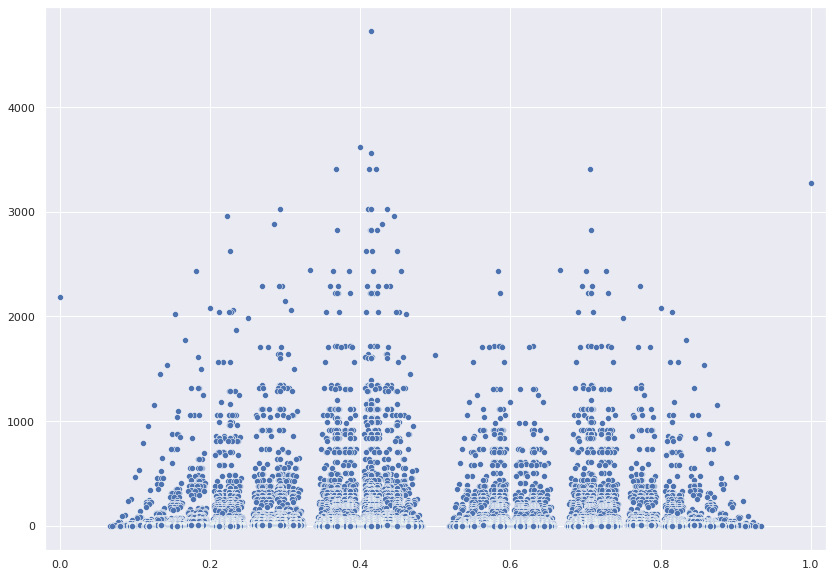

In [95]:
to_scatter(reachable_fractions(15, 3))

Aparentemente, la cantidad de fracciones entre 0 y 1 representables con fracciones continuas de coeficientes binarios [es conocida](https://oeis.org/search?q=1%2C++3%2C++3%2C++6%2C++8%2C++14%2C++21%2C++35%2C++55%2C++90%2C++144%2C++234%2C++377%2C++611%2C++987%2C++1598%2C++2584%2C++4182&sort=&language=english&go=Search).

In [36]:
[len(reachable_fractions(i)) for i in range(20)]

[1,
 2,
 1,
 3,
 3,
 6,
 8,
 14,
 21,
 35,
 55,
 90,
 144,
 234,
 377,
 611,
 987,
 1598,
 2584,
 4182]

In [60]:
[len(reachable_fractions(i, 3)) for i in range(16)]

[1,
 2,
 2,
 6,
 12,
 30,
 70,
 170,
 408,
 986,
 2378,
 5742,
 13860,
 33462,
 80782,
 195026]

In [58]:
[len(reachable_fractions(i, 4)) for i in range(12)]

[1, 2, 3, 11, 33, 110, 360, 1190, 3927, 12971, 42837, 141482]